In [18]:
import pandas as pd

# Load student scores CSV
df = pd.read_csv("../data/student_scores.csv")

# Show first few rows
df.head()


,StudentID,Name,Math,Science,English,Attendance (%)
0,1,Alice,78,92,69,75
1,2,Bob,55,88,63,89
2,3,Charlie,62,83,58,85
3,4,David,94,58,57,73
4,5,Eve,86,77,92,94


In [19]:
# Get average scores by subject
print("📊 Average Scores by Subject:")
print(df[["Math", "Science", "English"]].mean())

# Show top scorer in each subject
print("\n🏆 Top Scorers:")
for subject in ["Math", "Science", "English"]:
    top = df.loc[df[subject].idxmax()]
    print(f"{subject}: {top['Name']} - {top[subject]}")


📊 Average Scores by Subject:
Math       73.8
Science    75.0
English    68.4
dtype: float64

🏆 Top Scorers:
Math: Quinn - 98
Science: Peggy - 95
English: Ivan - 98


In [20]:
# Calculate final score (average of 3 subjects)
df["Final Score"] = df[["Math", "Science", "English"]].mean(axis=1)

# Define grading system
def get_grade(score):
    if score >= 90:
        return "Excellent"
    elif score >= 75:
        return "Good"
    elif score >= 60:
        return "Average"
    else:
        return "At Risk"

# Assign grade to each student
df["Grade"] = df["Final Score"].apply(get_grade)

# Display updated data
df[["Name", "Final Score", "Grade"]].head()


,Name,Final Score,Grade
0,Alice,79.666667,Good
1,Bob,68.666667,Average
2,Charlie,67.666667,Average
3,David,69.666667,Average
4,Eve,85.000000,Good


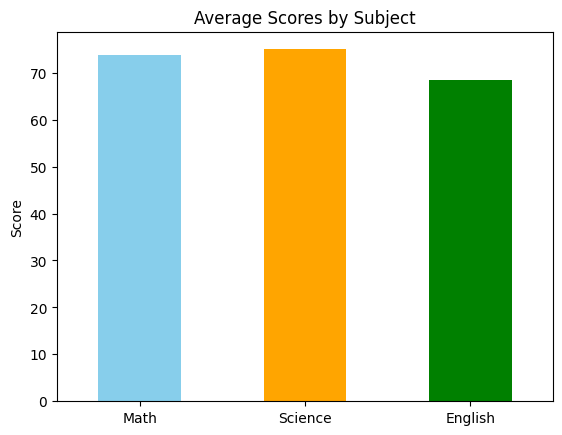

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: average subject scores
df[["Math", "Science", "English"]].mean().plot(kind="bar", color=["skyblue", "orange", "green"])
plt.title("Average Scores by Subject")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


C:\Users\SANTHOSH\AppData\Local\Temp\ipykernel_18712\2483053154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade", data=df, palette="Set2")


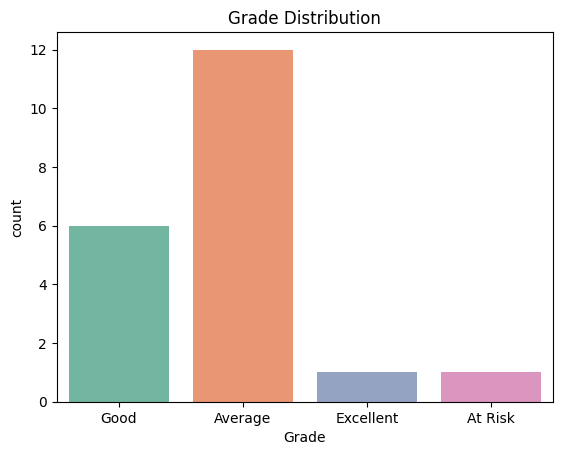

In [22]:
# Grade distribution
sns.countplot(x="Grade", data=df, palette="Set2")
plt.title("Grade Distribution")
plt.show()


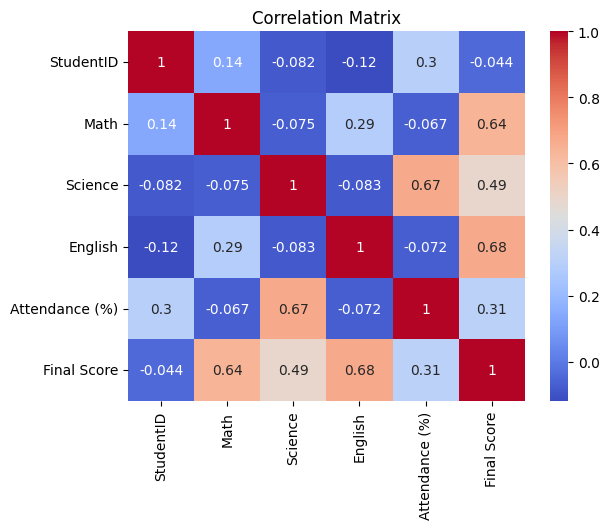

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [24]:
# Save final results with grades
df.to_csv("../output/student_scores_updated.csv", index=False)
print("✅ Updated CSV saved to output folder")


✅ Updated CSV saved to output folder
